In [41]:
# %load readweather.py
import sqlite3 as lite
import pandas as pd 
import collections
import matplotlib.pyplot as plt  

con = lite.connect('weather3.db')
df = pd.read_sql('SELECT * FROM daily_temp', con)

print df

city_temp_range = df.max() - df.min()
city_temp_range

    day_of_reading  Atlanta  Austin  Boston  Chicago  Cleveland
0       1460819760    71.42   73.21   51.63    69.38      62.78
1       1460906160    73.89   76.59   52.75    72.16      57.79
2       1460992560    80.10   72.97   65.21    73.73      67.39
3       1461078960    81.42   79.44   52.69    58.52      66.11
4       1461165360    80.61   79.37   51.48    67.71      63.35
5       1461251760    77.89   81.41   74.79    67.21      64.79
6       1461338160    72.44   82.35   76.51    56.59      62.91
7       1461424560    74.92   81.70   64.29    55.05      49.31
8       1461510960    78.66   77.53   50.33    74.52      55.24
9       1461597360    79.00   87.52   55.87    81.80      69.06
10      1461683760    81.98   84.84   53.80    72.89      64.50
11      1461770160    82.32   88.56   57.65    49.25      52.43
12      1461856560    83.79   86.05   51.62    49.06      50.15
13      1461942960    86.02   83.62   48.44    47.62      48.53
14      1462029360    85.27   83.69   53

day_of_reading    2505600.00
Atlanta                21.63
Austin                 20.90
Boston                 30.27
Chicago                34.18
Cleveland              26.48
dtype: float64

In [9]:
df['Atlanta'].mean()

78.508

In [10]:
df.describe()

,day_of_reading,Atlanta,Austin,Boston,Chicago,Cleveland
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.462073e+09,78.508000,81.186333,57.770000,61.692667,60.011333
std,7.606145e+05,5.638023,5.292642,8.822567,9.740732,7.153854
min,1.460820e+09,64.390000,69.500000,46.240000,47.620000,48.530000
25%,1.461446e+09,74.977500,76.825000,51.515000,54.487500,54.790000
50%,1.462073e+09,79.830000,82.775000,53.785000,63.500000,61.670000
75%,1.462699e+09,81.940000,85.012500,64.980000,67.585000,64.717500
max,1.463325e+09,86.020000,90.400000,76.510000,81.800000,75.010000


In [17]:
df[(['Atlanta'],['Austin])].mean()

SyntaxError: EOL while scanning string literal (<ipython-input-17-c866c7a120ec>, line 1)

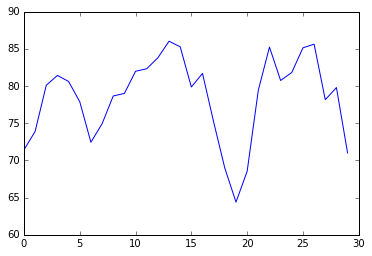

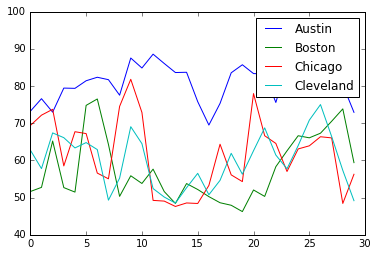

In [38]:
plt.figure()
plt.plot(df['Atlanta'])
plt.show()
plt.plot(df['Austin'])
plt.plot(df['Boston'])
plt.plot(df['Chicago'])
plt.plot(df['Cleveland'])
plt.legend()
plt.show()
%matplotlib inline

In [46]:
temp_change = collections.defaultdict(int)
for col in df.columns:
    city_temp_vals = df[col].tolist()
    city_temp_change = 0
    for k,v in enumerate(city_temp_vals):
        if k < len(city_temp_vals) - 1:
            city_temp_change += abs(city_temp_vals[k] - city_temp_vals[k+1])
            print city_temp_change

86400
172800
259200
345600
432000
518400
604800
691200
777600
864000
950400
1036800
1123200
1209600
1296000
1382400
1468800
1555200
1641600
1728000
1814400
1900800
1987200
2073600
2160000
2246400
2332800
2419200
2505600
2.47
8.68
10.0
10.81
13.53
18.98
21.46
25.2
25.54
28.52
28.86
30.33
32.56
33.31
38.71
40.53
47.07
53.26
57.83
61.97
72.87
78.67
83.16
84.24
87.55
88.04
95.5
97.13
105.92
3.38
7.0
13.47
13.54
15.58
16.52
17.17
21.34
31.33
34.01
37.73
40.24
42.67
42.74
50.64
56.93
62.75
70.98
73.14
75.51
75.61
83.28
93.5
98.11
103.44
105.31
109.14
115.86
123.25
1.12
13.58
26.1
27.31
50.62
52.34
64.56
78.52
84.06
86.13
89.98
96.01
99.19
104.52
106.11
108.03
109.67
110.35
112.05
117.86
119.59
127.58
131.84
135.9
136.46
137.7
140.91
144.24
158.69
2.78
4.35
19.56
28.75
29.25
39.87
41.41
60.88
68.16
77.07
100.71
100.9
102.34
103.28
103.42
108.27
119.35
127.59
129.4
153.06
164.39
166.46
174.0
180.06
180.9
183.34
183.65
201.27
209.11
4.99
14.59
15.87
18.63
20.07
21.95
35.55
41.48
55.3
59.86
71.9